# EVALUASI TENGAH SEMESTER GENAP 2019/20
## DATA MINING

## I. Library and Dataset 

The data consist of following features:
1. Date: date the accident happened
2. Time: time the accident happened
3. Location: where the accident happened
4. Operator: operator the crashed aircrafts belong to
5. Flight #: flight number of the plane
6. Route: route taken by the plane
7. Type: type of crashed aircrafts
8. Registration: unique alphanumeric string to identify the plane
9. cn/ln: construction or serial number / line or fuselage number
10. Aboard: number of people aboard the crashed aircrafts
11. Fatalities: number of people dead (who aboard the aircrafts)
12. Ground: number of people dead (who did not aboard the aircrafts)
13. Summary: brief accident description

In [1]:
#importing the libraries and data
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

df = pd.read_csv("C:/Users/#asus/Documents/STATISTIKA ITS/MATA KULIAH/SEMESTER 6/DATA MINING/airplane-crashes-since-1908/Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [19]:
#showing the first 3 of the data
df.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown Status,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Unknown Status,Test flight,Dirigible,Unknown,178,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,Unknown Status,Training,Curtiss seaplane,Unknown,178,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0


In [3]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


## II. Missing Value

In [4]:
#detecting missing values
df.isnull().any()

Date            False
Time             True
Location         True
Operator         True
Flight #         True
Route            True
Type             True
Registration     True
cn/In            True
Aboard           True
Fatalities       True
Ground           True
Summary          True
dtype: bool

In [5]:
#replacing numeric missing value with zero
df['Fatalities'].fillna(0, inplace = True)
df['Aboard'].fillna(0, inplace = True)
df['Ground'].fillna(0, inplace = True)

In [20]:
#creating new variable year
df['Year'] = pd.DatetimeIndex(df['Date']).year

#creating new variable survived, replacing its missing value to zero, and preventing negative values
df['Survived'] = df['Aboard'] - df['Fatalities']
df['Survived'].fillna(0, inplace = True)
df[df['Survived'] < 0] = 0

#replacing missing value in time to 00:00
df['Time'] = df['Time'].replace(np.nan, '00:00')

In [7]:
#replacing missing value in location, operator, flight #, type, registration, cn/ln, summary by its mode
df['Location'] = df['Location'].replace(np.nan, 'Moscow, Russia')
df['Operator'] = df['Operator'].replace(np.nan, 'Aeroflot')
df['Flight #'] = df['Flight #'].replace(np.nan, 'Unknown Status')
df['Flight #'] = df['Flight #'].replace('-', 'Unknown Status')
df['Route'] = df['Route'].replace(np.nan, 'Training')
df['Type'] = df['Type'].replace(np.nan, 'Douglas DC-3')
df['Registration'] = df['Registration'].replace(np.nan, 'Unknown')
df['cn/In'] = df['cn/In'].replace(np.nan, '178')
df['Summary'] = df['Summary'].replace(np.nan, 'Crash during takeoff')

In [8]:
#re-detecting missing values
df.isnull().any()

Date            False
Time            False
Location        False
Operator        False
Flight #        False
Route           False
Type            False
Registration    False
cn/In           False
Aboard          False
Fatalities      False
Ground          False
Summary         False
Year            False
Survived        False
dtype: bool

In [9]:
#showing the first 3 data of the new dataframe
df.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown Status,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Unknown Status,Test flight,Dirigible,Unknown,178,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,Unknown Status,Training,Curtiss seaplane,Unknown,178,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0


## III. Outliers

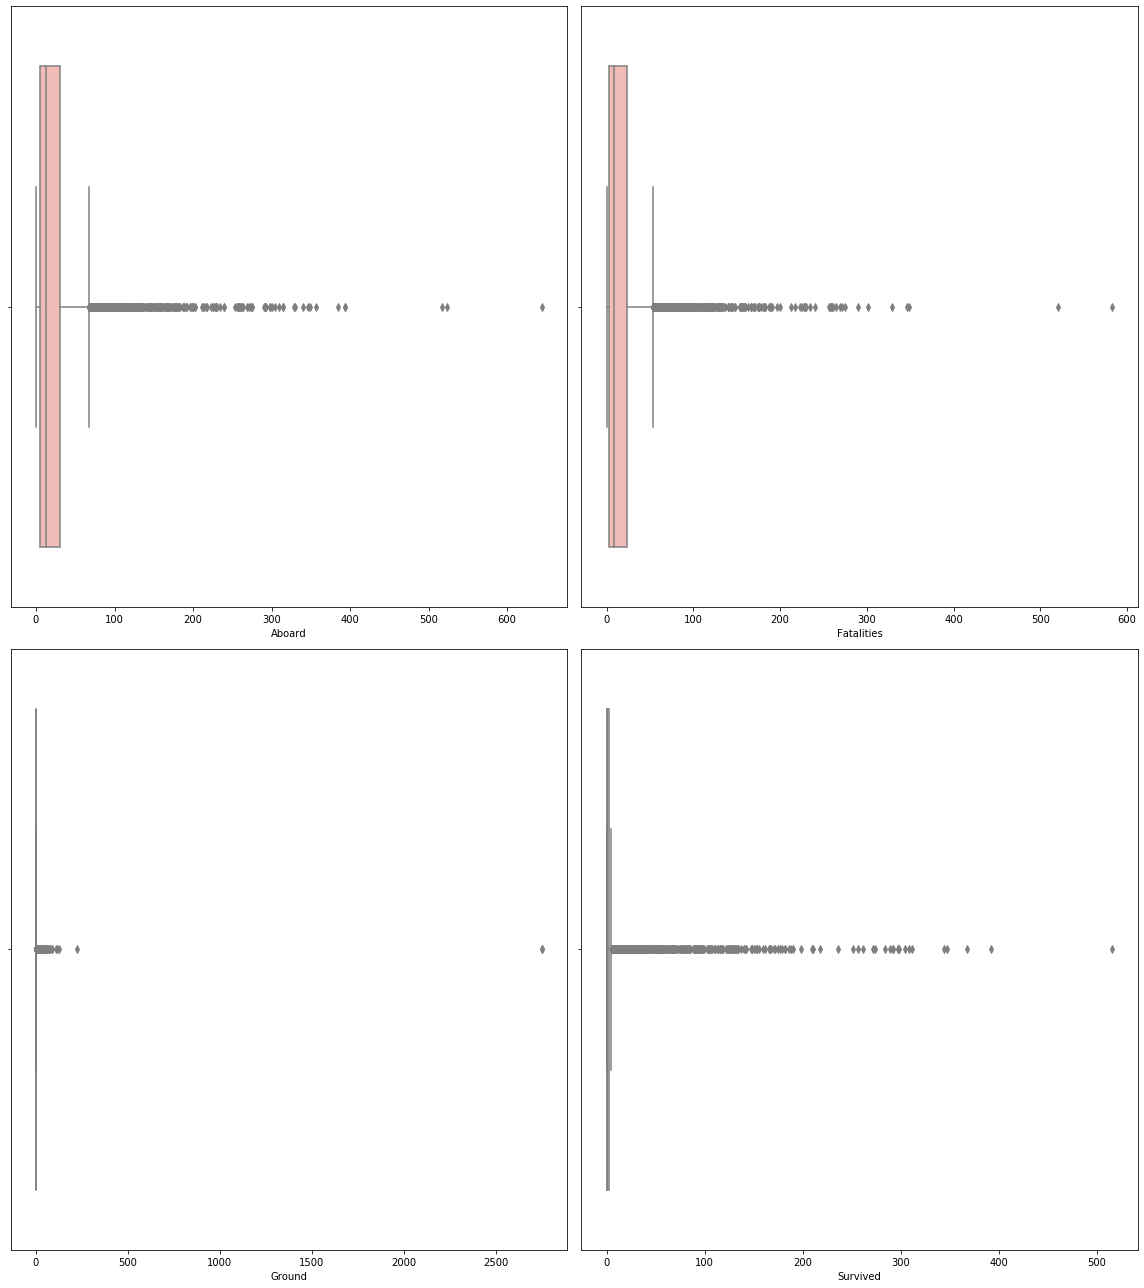

In [10]:
#generating boxplot to check outliers
num_features = ['Aboard', 'Fatalities', 'Ground', 'Survived']
n = 1
plt.figure(figsize=(16,18))
for feature in num_features:
    plt.subplot(2,2,n)
    sns.boxplot(df[feature], palette="Pastel1")
    n+=1
    plt.tight_layout()

In [11]:
#handling outliers
AllindexOutlier=[]    
df_handled = df[num_features].copy()
Q1 = df_handled.quantile(0.25)
Q3 = df_handled.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1 : " + str(Q1))
print("Q3 : " + str(Q3))
outliers_vector = ~((df_handled < (lower_bound)) | (df_handled > (upper_bound)))
df_handled1 = df_handled[outliers_vector]

lower bound is Aboard       -32.5
Fatalities   -27.0
Ground         0.0
Survived      -3.0
dtype: float64
upper bound is Aboard        67.5
Fatalities    53.0
Ground         0.0
Survived       5.0
dtype: float64
Q1 : Aboard        5.0
Fatalities    3.0
Ground        0.0
Survived      0.0
Name: 0.25, dtype: float64
Q3 : Aboard        30.0
Fatalities    23.0
Ground         0.0
Survived       2.0
Name: 0.75, dtype: float64


In [12]:
print(df_handled1)

      Aboard  Fatalities  Ground  Survived
0        2.0         1.0     0.0       1.0
1        5.0         5.0     0.0       0.0
2        1.0         1.0     0.0       0.0
3       20.0        14.0     0.0       NaN
4       30.0        30.0     0.0       0.0
...      ...         ...     ...       ...
5263     NaN         NaN     NaN       NaN
5264     4.0         4.0     0.0       0.0
5265     NaN         NaN     0.0       0.0
5266     1.0         1.0     0.0       0.0
5267    13.0        13.0     0.0       0.0

[5268 rows x 4 columns]


In [13]:
df_handled1.fillna(0, inplace = True)

In [14]:
print(df_handled1)

      Aboard  Fatalities  Ground  Survived
0        2.0         1.0     0.0       1.0
1        5.0         5.0     0.0       0.0
2        1.0         1.0     0.0       0.0
3       20.0        14.0     0.0       0.0
4       30.0        30.0     0.0       0.0
...      ...         ...     ...       ...
5263     0.0         0.0     0.0       0.0
5264     4.0         4.0     0.0       0.0
5265     0.0         0.0     0.0       0.0
5266     1.0         1.0     0.0       0.0
5267    13.0        13.0     0.0       0.0

[5268 rows x 4 columns]


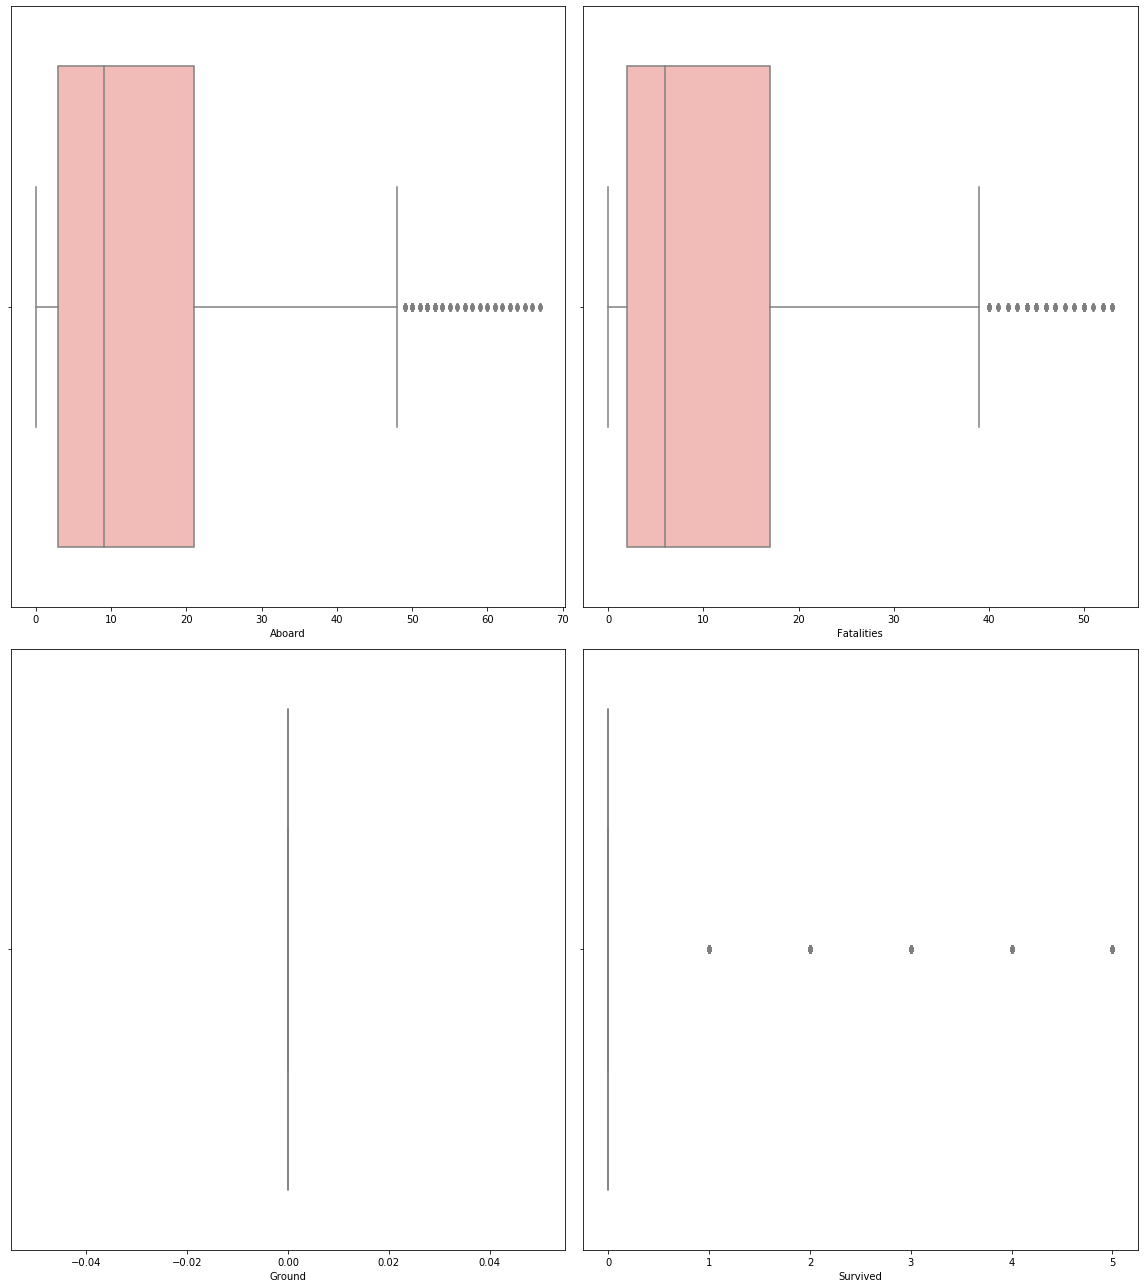

In [15]:
#generating boxplot to recheck outliers
n = 1
plt.figure(figsize=(16,18))
for feature in num_features:
    plt.subplot(2,2,n)
    sns.boxplot(df_handled1[feature], palette="Pastel1")
    n+=1
    plt.tight_layout()

## IV. Summary Statistics and Visualization 

In [16]:
#summary statistics
df.describe()

,Aboard,Fatalities,Ground,Year,Survived
count,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000
mean,27.439446,19.999620,1.601367,1967.572134,7.439825
std,43.023370,33.167324,53.875051,88.681470,28.089951
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000,1954.000000,0.000000
50%,13.000000,9.000000,0.000000,1973.000000,0.000000
75%,30.000000,23.000000,0.000000,1990.000000,2.000000
max,644.000000,583.000000,2750.000000,2009.000000,516.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 15 columns):
Date            5268 non-null object
Time            5268 non-null object
Location        5268 non-null object
Operator        5268 non-null object
Flight #        5268 non-null object
Route           5268 non-null object
Type            5268 non-null object
Registration    5268 non-null object
cn/In           5268 non-null object
Aboard          5268 non-null float64
Fatalities      5268 non-null float64
Ground          5268 non-null float64
Summary         5268 non-null object
Year            5268 non-null int64
Survived        5268 non-null float64
dtypes: float64(4), int64(1), object(10)
memory usage: 617.5+ KB


In [25]:
#cleaning time
df['Time'] = df['Time'].replace(np.nan, '00:00') 
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df['Time'].str.replace('c:', '')
df['Time'] = df['Time'].str.replace('c', '')
df['Time'] = df['Time'].str.replace('12\'20', '12:20')
df['Time'] = df['Time'].str.replace('18.40', '18:40')
df['Time'] = df['Time'].str.replace('0943', '09:43')
df['Time'] = df['Time'].str.replace('22\'08', '22:08')
df['Time'] = df['Time'].str.replace('114:20', '00:00')  

df['Time'] = df['Date'] + ' ' + df['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
df['Time'] = df['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(df.Time.min()) + ' to ' + str(df.Time.max()))

#plot of total accidents per year
Temp = df.groupby(df.Time.dt.year)[['Date']].count() #Temp is temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

ValueError: ('Unknown string format:', '0       09/17/1908\n1       07/12/1912\n2       08/06/1913\n3       09/09/1913\n4       10/17/1913\n           ...    \n5263    05/20/2009\n5264    05/26/2009\n5265    06/01/2009\n5266    06/07/2009\n5267    06/08/2009\nName: Date, Length: 5268, dtype: object 0       0       09/17/1908\\n1       07/12/1912\\n2     ...\n1       0       09/17/1908\\n1       07/12/1912\\n2     ...\n2       0       09/17/1908\\n1       07/12/1912\\n2     ...\n3       0       09/17/1908\\n1       07/12/1912\\n2     ...\n4       0       09/17/1908\\n1       07/12/1912\\n2     ...\n                              ...                        \n5263    0       09/17/1908\\n1       07/12/1912\\n2     ...\n5264    0       09/17/1908\\n1       07/12/1912\\n2     ...\n5265    0       09/17/1908\\n1       07/12/1912\\n2     ...\n5266    0       09/17/1908\\n1       07/12/1912\\n2     ...\n5267    0       09/17/1908\\n1       07/12/1912\\n2     ...\nName: Time, Length: 5268, dtype: object')

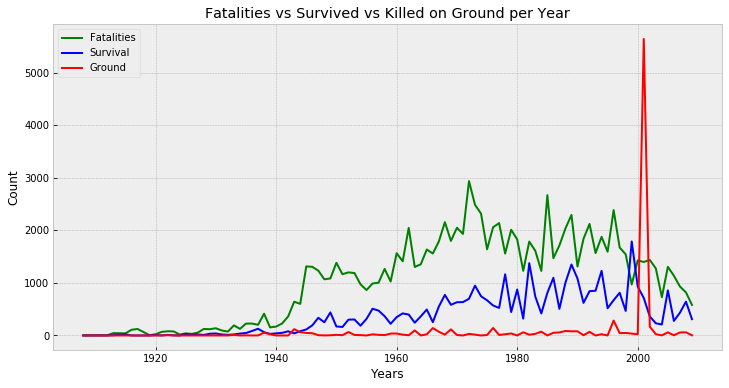

In [60]:
#plot of fatalities vs survived vs ground
FSG_per_year = df[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()
FSG_per_year = FSG_per_year.reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year, color = 'green')
sns.lineplot(x = 'Year', y = 'Survived', data = FSG_per_year, color = 'blue')
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year, color = 'red')
plt.legend(['Fatalities', 'Survival', 'Ground'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Fatalities vs Survived vs Killed on Ground per Year')
plt.show()

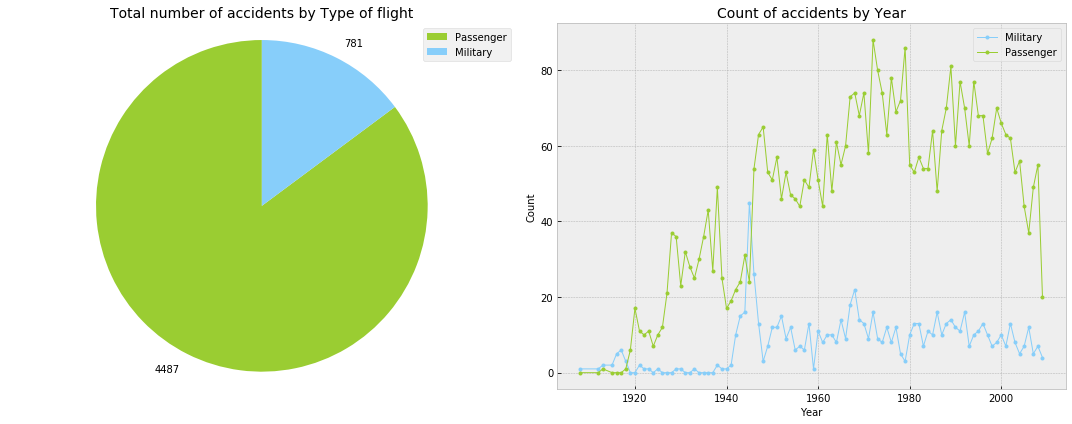

In [15]:
#plot of military vs passengers flights
Temp = df.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('Military')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = df.copy()
Temp2['Military'] = Temp2.Operator.str.contains('Military')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

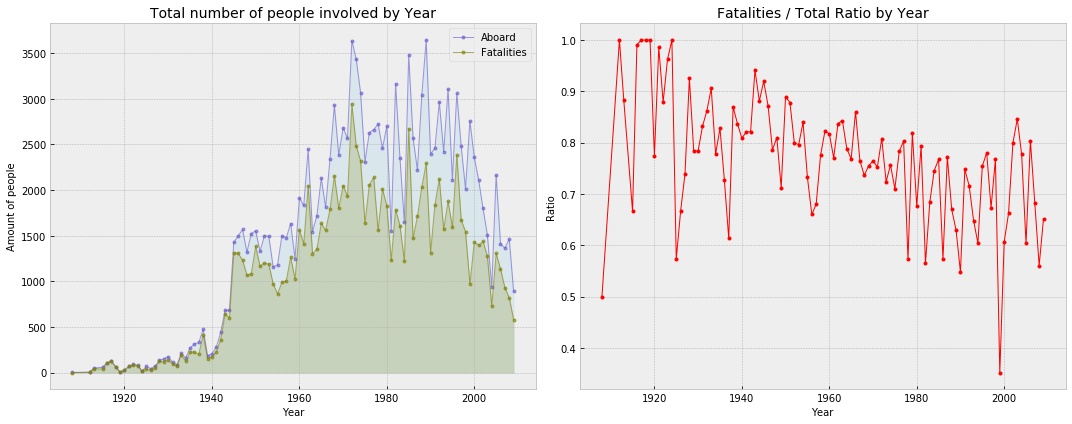

In [16]:
#plot of total of fatalities
Fatalities = df.groupby(df.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

In [44]:
#dataset for total
totals = pd.read_excel(r'C:/Users/#asus/Documents/STATISTIKA ITS/MATA KULIAH/SEMESTER 6/DATA MINING/airplane-crashes-since-1908/totals4.xlsx')
totals.head()

,Year,Sum,Fatalities
0,1970,1.861781e+09,2049
1,1971,1.995367e+09,1932
2,1972,1.834273e+09,2937
3,1973,2.406419e+09,2485
4,1974,2.884859e+09,2318


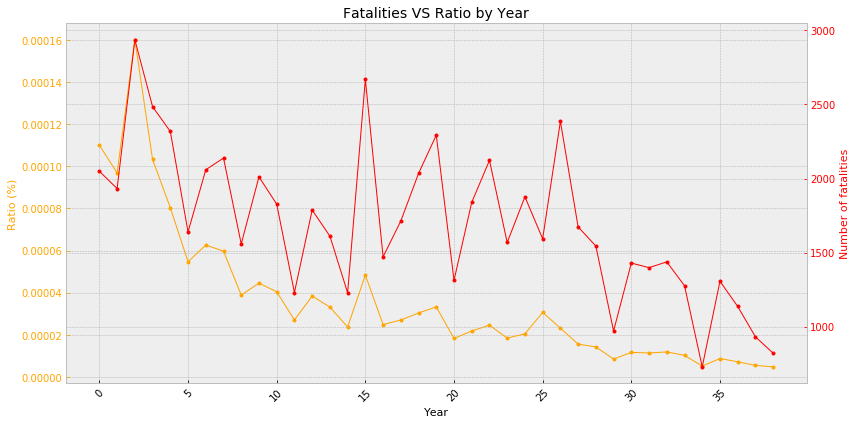

In [46]:
#plot of fatalities vs ratio
totals['Ratio'] = totals['Fatalities'] / totals['Sum'] * 100 #calculating ratio

fig =plt.figure(figsize=(12,6))
ax1 = fig.subplots()
ax1.plot(totals.index, 'Ratio', data=totals, color='orange', marker = ".", linewidth=1)
ax1.set_xlabel('Year', fontsize=11)
for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
ax1.set_ylabel('Ratio (%)', color='orange', fontsize=11)
ax1.tick_params('y', colors='orange')
ax2 = ax1.twinx()
ax2.plot(totals.index, 'Fatalities', data=totals, color='red', marker = ".", linewidth=1)
ax2.set_ylabel('Number of fatalities', color='red', fontsize=11)
ax2.tick_params('y', colors='r')
plt.title('Fatalities VS Ratio by Year', loc='Center', fontsize=14)
fig.tight_layout()
plt.show()

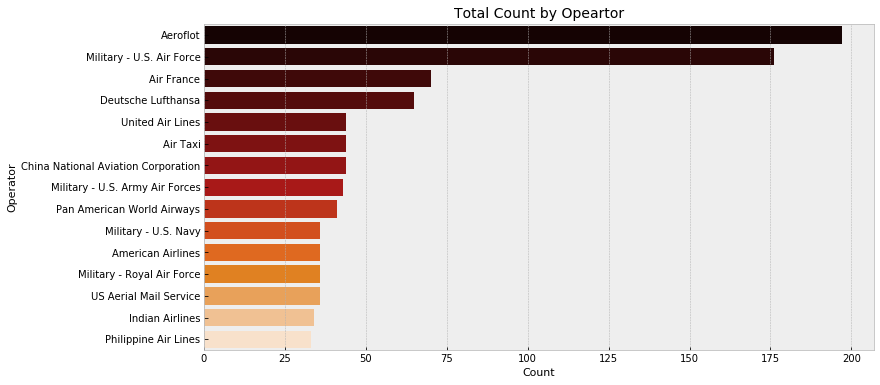

In [47]:
#plot of count of operator
total_by_Op = df.groupby('Operator')[['Operator']].count()
total_by_Op = total_by_Op.rename(columns={"Operator": "Count"})
total_by_Op = total_by_Op.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=total_by_Op.index, x="Count", data=total_by_Op, palette="gist_heat", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Opeartor', loc='Center', fontsize=14)
plt.show()

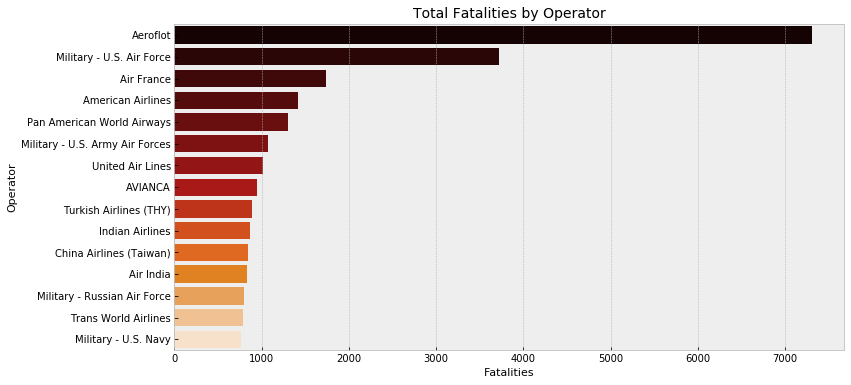

In [49]:
#plot of operator proportion causing fatalities 
prop_by_Op = df.groupby('Operator')[['Fatalities']].sum()
prop_by_Op = prop_by_Op.rename(columns={"Operator":"Fatalities"})
prop_by_Op = prop_by_Op.sort_values(by='Fatalities', ascending=False)
prop_by_OpTOP = prop_by_Op.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=prop_by_OpTOP.index, x="Fatalities", data=prop_by_OpTOP, palette="gist_heat", orient='h')
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Operator', loc='Center', fontsize=14)
plt.show()

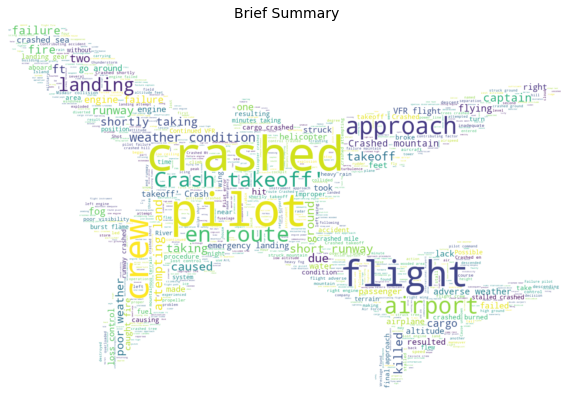

In [54]:
#word cloud of summary
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.Summary.tolist())
plane_mask = np.array(Image.open('C:/Users/#asus/Documents/STATISTIKA ITS/MATA KULIAH/SEMESTER 6/DATA MINING/aircraft-1293790_1280.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask, stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

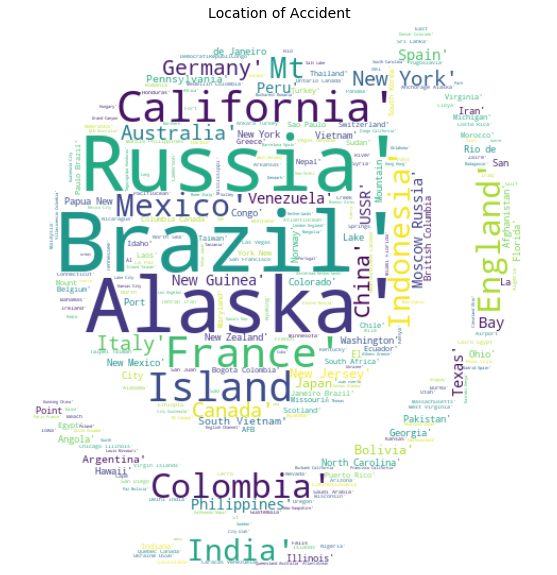

In [55]:
#cloud of location of the accident
text = str(df.Location.tolist())
globe_mask = np.array(Image.open('C:/Users/#asus/Documents/STATISTIKA ITS/MATA KULIAH/SEMESTER 6/DATA MINING/globe-with-support.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Location of Accident', loc='Center', fontsize=14)
plt.show()

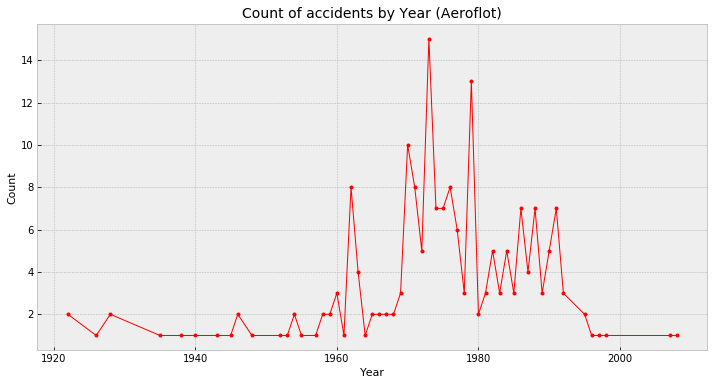

In [56]:
#plot of count of fatalities by aeroflot
aeroflot = df[df.Operator == 'Aeroflot']

Count_by_Year = aeroflot.groupby(df.Time.dt.year)[['Date']].count()
Count_by_Year = Count_by_Year.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.plot(Count_by_Year.index, 'Count', data=Count_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by Year (Aeroflot)', loc='Center', fontsize=14)
plt.show()

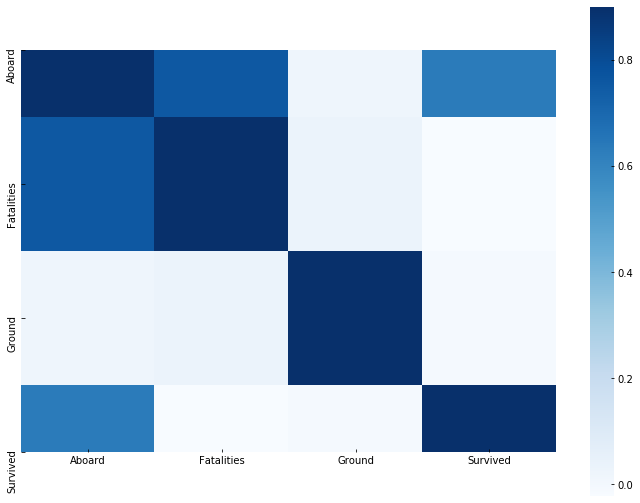

In [74]:
#corr plot of numerical features
plt.figure(figsize=(12,9))
corr = df[num_features].corr()
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)
plt.show()

## V. Clustering Analysis with K-Means

1. Importing needed libraries

In [22]:
#library needed for clustering and pca
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

2. Data preparation

In [109]:
#removing missing value in summary
text_data = df['Summary'].dropna()
text_data = pd.DataFrame(text_data)
#for reproducibility
random_state = 0

In [113]:
#kmeans only works with number, feature extraction to get numbers
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)

AttributeError: 'int' object has no attribute 'lower'

3. Model fitting

In [112]:
#kmeans algorithm with 7 clusters
model = MiniBatchKMeans(n_clusters=7, random_state=random_state)
model.fit(X)

NameError: name 'X' is not defined

In [81]:
#cluster center vectors
model.cluster_centers_

array([[0.        , 0.03146256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00017761, 0.00772559, 0.00026829, ..., 0.        , 0.00011931,
        0.00020671],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00453887, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00307359, 0.        , ..., 0.        , 0.00025704,
        0.        ],
       [0.        , 0.00338423, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [82]:
#predicting cluster labels for new dataset
model.predict(X)

#getting cluster labels for the dataset used while training the model (used for models that does not support prediction on new dataset).
model.labels_

array([1, 1, 1, ..., 1, 1, 6])

In [83]:
#printing most common terms per cluster
print ('Most Common Terms per Cluster:')

order_centroids = model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()

for i in range(7):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print

Most Common Terms per Cluster:


Cluster 0:
mountain
shot
struck
crashed
flew
ft
aircraft
rebels
000
poor


Cluster 1:
crashed
aircraft
approach
plane
runway
pilot
land
flight
cargo
attempting


Cluster 2:
crash
takeoff
crashed
mountain
plane
altitude
lost
losing
causing
engine


Cluster 3:
weather
conditions
vfr
adverse
flight
poor
continued
pilot
crashed
mountain


Cluster 4:
fuel
tank
starvation
ran
crashed
aircraft
running
plane
engine
engines


Cluster 5:
engine
crashed
shortly
failure
taking
landing
takeoff
plane
aircraft
emergency


Cluster 6:
en
route
crashed
mountain
disappeared
plane
cargo
sea
mountainous
terrain


## VI. Feature Extraction with Principal Component Analysis

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

In [87]:
print(pca.explained_variance_)

[0.07396109 0.01637332]
